In [1]:
# from pdfquery import PDFQuery
from matplotlib import pyplot as plt
import re
from bs4 import BeautifulSoup
import requests
from collections import Counter

In [2]:
#Get the Website using requests
url = "https://www.churchofjesuschrist.org/study/general-conference/2022/10/25soares?lang=eng"
response = requests.get(url)
if response.status_code == 200:
    print("Success")
    html_content    = response.content
else:
    print("Failure")




Success


In [3]:
#Get the Website using requests
topic = "marriage"
url = "https://www.churchofjesuschrist.org/study/general-conference/topics/{}?lang=eng".format(topic)
response = requests.get(url)
if response.status_code == 200:
    print("Success")
    html_content    = response.content
else:
    print("Failure")
# print(response.text)

#Parse the HTML
soup = BeautifulSoup(response.content, "lxml")
links = soup.find_all("a")
# print(soup.prettify())
#Change encoding
soup.encode('utf-8')
# print(soup.prettify())
fixed_links =[]
for link in links:
    href = link.get("href")
    if href is not None:
        href = "https://www.churchofjesuschrist.org" + href
        # print(href)
        fixed_links.append(href)
  

#Get article text

#get the text
# for article in article_text:


Success


In [4]:
file_folder = "/scholarly_articles"
counter_link = 0
load_links = True
scholar_links=[
    "https://go-gale-com.byu.idm.oclc.org/ps/retrieve.do?tabID=T002&resultListType=RESULT_LIST&searchResultsType=SingleTab&retrievalId=25b69e24-30ec-4088-96cf-1da6994236e0&hitCount=16370&searchType=AdvancedSearchForm&currentPosition=24&docId=GALE%7CA749396714&docType=Letter+to+the+editor&sort=Relevance&contentSegment=ZONE-MOD1&prodId=AONE&pageNum=2&contentSet=GALE%7CA749396714&searchId=R3&userGroupName=byuprovo&inPS=true"
]
for link in scholar_links:
    if not load_links:
        break
    counter_link +=1
    try:
        response = requests.get(link)
    except:
        continue
    soup = BeautifulSoup(response.content, "html.parser", from_encoding="utf-8")
    print(soup.prettify())

<!DOCTYPE html>
<html class="login-pf">
 <head>
  <meta charset="utf-8"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   <meta content="noindex, nofollow" name="robots"/>
   <meta content="width=device-width,initial-scale=1" name="viewport">
    <title>
     Sign in to byu
    </title>
    <link href="/resources/wwwh8/login/keycloak/img/favicon.ico" rel="icon"/>
    <link href="/resources/wwwh8/common/keycloak/web_modules/@patternfly/react-core/dist/styles/base.css" rel="stylesheet"/>
    <link href="/resources/wwwh8/common/keycloak/web_modules/@patternfly/react-core/dist/styles/app.css" rel="stylesheet"/>
    <link href="/resources/wwwh8/common/keycloak/node_modules/patternfly/dist/css/patternfly.min.css" rel="stylesheet"/>
    <link href="/resources/wwwh8/common/keycloak/node_modules/patternfly/dist/css/patternfly-additions.min.css" rel="stylesheet"/>
    <link href="/resources/wwwh8/common/keycloak/lib/pficon/pficon.css" rel="stylesheet"/>
    <link href="/

In [5]:
#Put the links in unique files
file_folder = "/articles"
counter_link= 0
load_links = False
for link in fixed_links:
    if(load_links != True):
        break
    print(link)
    text_total = []
    counter_link += 1
    text_total = []
    try:
        response = requests.get(link)
        # print("Success: " + link)
    except:
        print("Error: " + link)
        continue
    #Parse the HTML
    soup = BeautifulSoup(response.content, "html.parser", from_encoding="utf-8")
    article_text = soup.find_all('article')
    for i in article_text:
        text_total += i.get_text()
    text_total = ''.join(text_total)
    text_total_no_a = [x.replace('â', ' ') for x in text_total]
  #remove all non standard characters
    text_total_s = [re.sub(r'[^\w\s]','',x) for x in text_total_no_a]
  # text_total_s = text_total_s.lower()
    text_total_s = "".join(text_total_s)
    text_total_s = text_total_s.lower()
    text_total_s = text_total_s.split()
    text_total_s = " ".join(text_total_s)

    #put the text in a file
    open("articles/{}article{}.txt".format(topic, counter_link), "w").write(text_total_s)

    

In [6]:
total_counter = Counter()
#get all the files in the folder
import os
file_folder = ""
files = os.listdir("./articles")
files = [x for x in files if ( x.endswith(".txt") and x.startswith(topic))]
print(files)
total_counter = Counter()
for f in files:
    temp_article = open("articles/{}".format(f), "r").read()
    temp_article_list = temp_article.split()
    total_counter += Counter(temp_article_list)
#   text_total = []
#   try:
#     response = requests.get(link)
#     print("Success: " + link)
#   except:
#     print("Error: " + link)
#     continue
#   soup = BeautifulSoup(response.content, "html.parser", from_encoding="utf-8")
#   article_text = soup.find_all('article')
#   for i in article_text:
#     text_total += i.get_text()
#   text_total = ''.join(text_total)
#   text_total_no_a = [x.replace('â', ' ') for x in text_total]
#   #remove all non standard characters
#   text_total_s = [re.sub(r'[^\w\s]','',x) for x in text_total_no_a]
#   # text_total_s = text_total_s.lower()
#   text_total_s = "".join(text_total_s)
#   text_total_s = text_total_s.lower()
#   text_total_s = text_total_s.split()
#   total_counter += Counter(text_total_s)
#   print(Counter(text_total_s))


# #replace â
# print(len(text_total))
# print(len(text_total_no_a))
# print(len(text_total_s))
print(total_counter.most_common(10))
total_counter_copy = total_counter.copy()
total_counter_value = sum(total_counter_copy.values())
print(total_counter_value)


['marriagearticle102.txt', 'marriagearticle67.txt', 'marriagearticle72.txt', 'marriagearticle69.txt', 'marriagearticle95.txt', 'marriagearticle24.txt', 'marriagearticle32.txt', 'marriagearticle84.txt', 'marriagearticle93.txt', 'marriagearticle48.txt', 'marriagearticle22.txt', 'marriagearticle88.txt', 'marriagearticle98.txt', 'marriagearticle97.txt', 'marriagearticle10.txt', 'marriagearticle57.txt', 'marriagearticle25.txt', 'marriagearticle29.txt', 'marriagearticle126.txt', 'marriagearticle19.txt', 'marriagearticle76.txt', 'marriagearticle65.txt', 'marriagearticle81.txt', 'marriagearticle123.txt', 'marriagearticle85.txt', 'marriagearticle104.txt', 'marriagearticle59.txt', 'marriagearticle39.txt', 'marriagearticle70.txt', 'marriagearticle62.txt', 'marriagearticle2.txt', 'marriagearticle17.txt', 'marriagearticle37.txt', 'marriagearticle41.txt', 'marriagearticle114.txt', 'marriagearticle100.txt', 'marriagearticle116.txt', 'marriagearticle96.txt', 'marriagearticle7.txt', 'marriagearticle49.

In [7]:
print(len(fixed_links))
total_words = sum(total_counter.values())
print(total_words)


134
284250


In [8]:
# #load a pdf
# pdf = PDFQuery("/content/2022-10-2050-ulisses-soares-eng.pdf")
# pdf.load()

# # Use CSS-like selectors to locate the elements
# text_elements = pdf.pq('LTTextLineHorizontal')

# # Extract the text from the elements
# text = [t.text for t in text_elements]

# print(text)


In [9]:
#Filter Common Words
common_words = ['the', 'and',  "in", 'of', 'to', 'a', 'their', 'they', 'with', 'that', 'as' 'for', 'is', 'not', 'this', 'by', 'or', 'as', 'for', 'i', 'are', 'be', 'also']
def filter_common_words(words):
  for word in common_words:
    words[word] = 0
    # words.remove(word)


In [10]:

#Count the words
def count_words(words):
  word_count = {}
  words = words.split()
  for word in words:
    word = word.lower()
    if word in word_count:
      word_count[word] += 1
    else:
      word_count[word] = 1
  return word_count

In [11]:

gist_file = open("gist_stopwords.txt", "r")
try:
    content = gist_file.read()
    stopwords = content.split(",")
finally:
    gist_file.close()

In [12]:
#Filter Common Words
common_words = ['the', 'and',  "in", 'of', 'to', 'a', 'their', 'they', 'with', 'that', 'as' 'for', 'is', 'not', 'this', 'by', 'or', 'as', 'for', 'i', 'are', 'be', 'also']
filtered = 0

def filter_common_words(words):
  for word in stopwords:
    words[word] = 0
  return words


In [13]:
def sort_words(words):
  words = {k: v for k, v in sorted(words.items(), key=lambda item: item[1])}
  #remove if less than 2
  for key in list(words.keys()):
    if words[key] < 3 or len(key) < 3:
      del words[key]
  return words

In [14]:
sanity_check_the = total_counter["the"]/total_words
print(total_counter)
print(sanity_check_the)

Counter({'the': 16471, 'and': 10813, 'of': 10800, 'to': 8535, 'in': 5689, 'a': 5225, 'that': 4148, 'is': 3646, 'i': 3082, 'you': 2868, 'we': 2844, 'for': 2658, 'be': 2398, 'are': 2357, 'it': 2163, 'as': 2060, 'our': 1960, 'with': 1941, 'have': 1767, 'his': 1719, 'your': 1636, 'they': 1585, 'will': 1581, 'this': 1532, 'not': 1520, 'he': 1441, 'their': 1350, 'who': 1271, 'by': 1249, 'all': 1236, 'was': 1133, 'my': 1130, 'or': 1126, 'god': 1059, 'family': 1058, 'children': 1002, 'marriage': 1002, 'on': 981, 'from': 927, 'lord': 922, 'one': 917, 'but': 903, 'can': 898, 'us': 884, 'when': 880, 'do': 869, 'church': 853, 'which': 824, 'there': 815, 'them': 796, 'see': 779, 'love': 777, 'life': 756, 'has': 751, 'an': 707, 'her': 681, 'so': 661, 'may': 660, 'what': 652, 'if': 633, 'no': 604, 'would': 602, 'those': 591, 'at': 579, 'man': 564, 'father': 562, 'had': 560, 'these': 546, 'said': 544, 'other': 531, 'world': 531, 'priesthood': 524, 'eternal': 523, 'me': 514, 'home': 503, 'she': 502, 'm

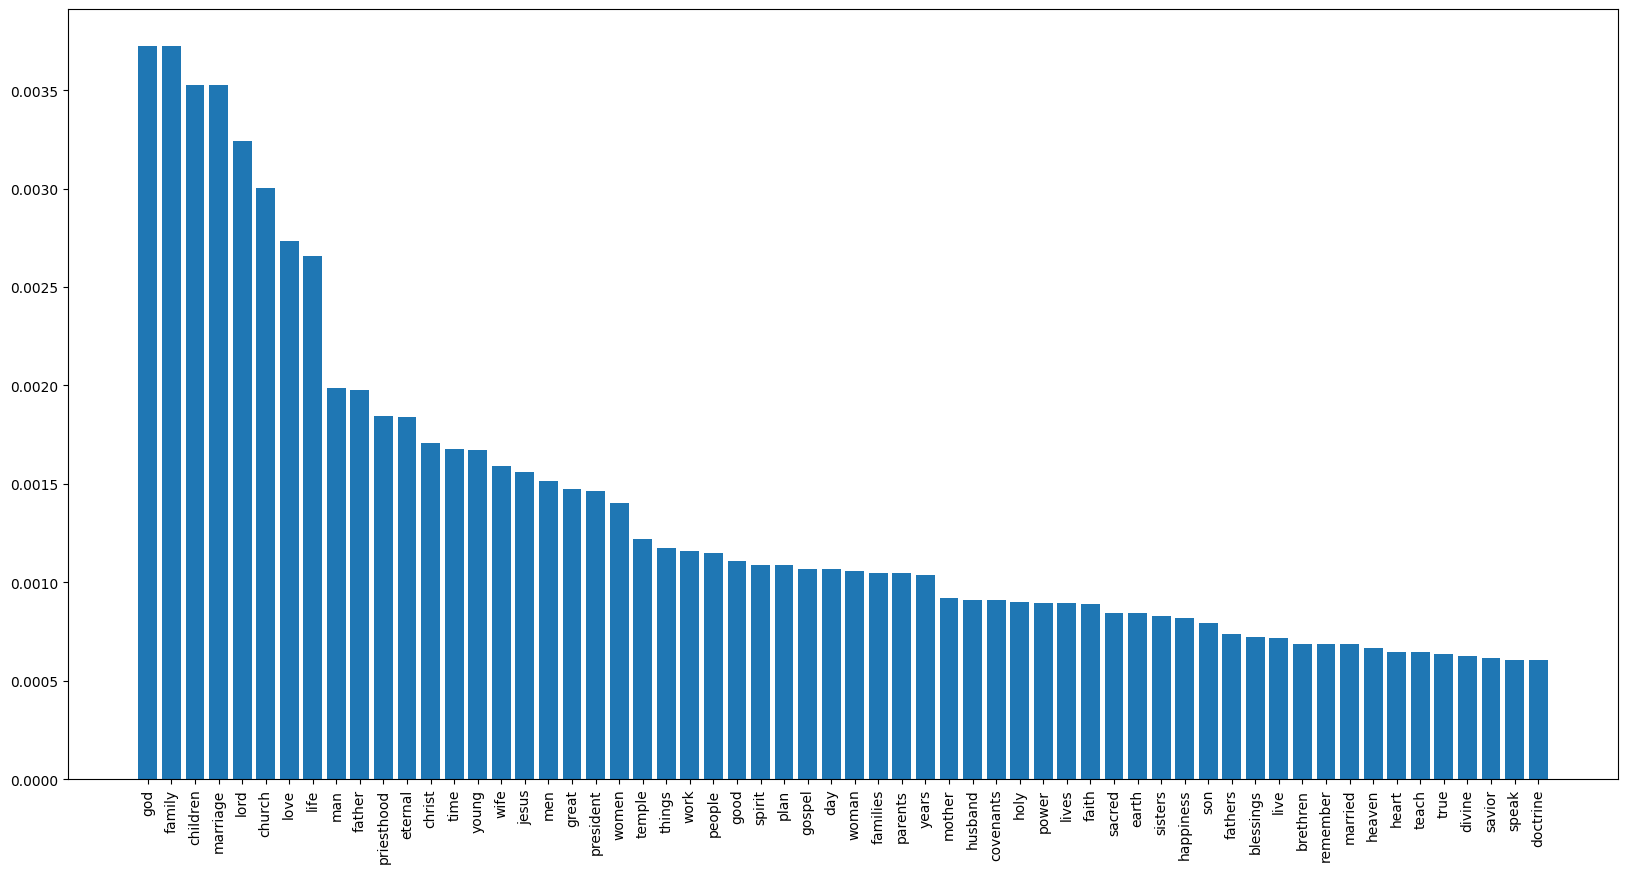

In [15]:
if not filtered:
    word_count = filter_common_words(total_counter)
    word_count = sort_words(word_count)
    filtered = 1
most_common_words = (Counter(word_count).most_common(60))
#Convert word count to frequency
most_common_words = {k: v / total_words for k, v in most_common_words}
#Plot
plt.figure(figsize=(20,10))
plt.bar(range(len(most_common_words)), list(most_common_words.values()), align='center')
plt.xticks(range(len(most_common_words)), list(most_common_words.keys()), rotation='vertical')
plt.show()

In [16]:
#compare
#open the file of  unigram_freq into pandas df
import pandas as pd
df = pd.read_csv("unigram_freq.csv")
total = df['count'].sum()
print(total)
df['count'] = df['count'] / total
print(df.head(1000).to_string())
for key, value in total_counter_copy.most_common(100):
    print(key, " : " , value / total_words)

    


588124220187
              word     count
0              the  0.039338
1               of  0.022363
2              and  0.022100
3               to  0.020637
4                a  0.015441
5               in  0.014401
6              for  0.010089
7               is  0.008001
8               on  0.006377
9             that  0.005781
10              by  0.005696
11            this  0.005489
12            with  0.005412
13               i  0.005248
14             you  0.005094
15              it  0.004783
16             not  0.004478
17              or  0.004405
18              be  0.004079
19             are  0.004070
20            from  0.003869
21              at  0.003864
22              as  0.003821
23            your  0.003506
24             all  0.003439
25            have  0.002660
26             new  0.002638
27            more  0.002627
28              an  0.002582
29             was  0.002522
30              we  0.002365
31            will  0.002306
32            home  0.002171
3

400
398
god 5481426.391508935
family 2448164.532777249
children 2853228.768226166
marriage 19263133.230541375
lord 11388818.503858186
church 5932924.512414208
love 2272776.809282152
life 1450362.2895987483
man 1828108.1840779425
father 6803668.5757119395
priesthood 353365872.52197003
eternal 43618770.06791371
christ 10042074.18400543
time 308072.42527303094
young 2048962.5505052805
wife 5662459.788713207
jesus 7459090.57053784
men 1452922.723120234
great 817360.936933102
president 2150733.7364350636
women 967594.934846271
temple 12713357.8372351
things 1327523.3600558054
work 462666.077181361
people 400406.55471293005
good 506454.22258043516
spirit 4915393.871514667
plan 1130542.0239727842
gospel 14220513.209914906
day 399343.79927612003
woman 2506958.648681488
families 3696694.439045043
parents 2861788.511279072
years 511803.96277406684
mother 2682940.8152016317
husband 6578659.39906522
covenants 124054522.62884542
holy 6355878.341162185
power 659249.5424617663
lives 3494348.331870754

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


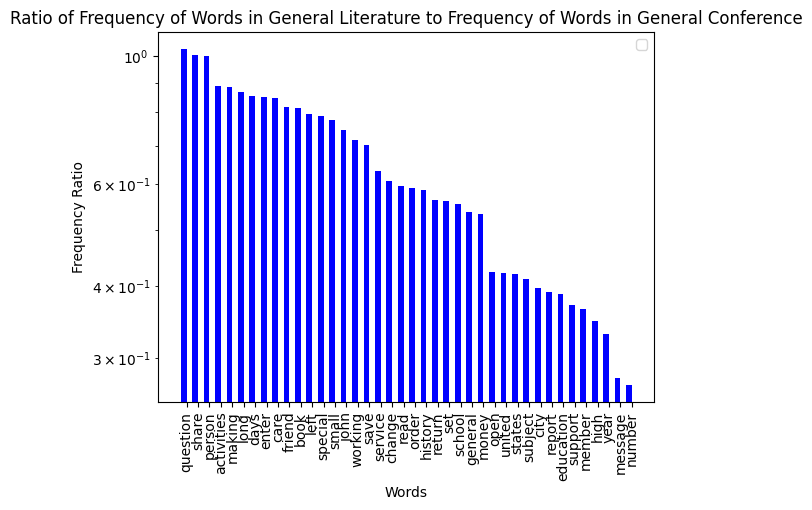

In [17]:
#Create a df mask

bar_width = .5
word_count_copy = Counter(word_count)
# word_count_total = sum(word_count_copy.values())
word_counter_total = total_counter_value
word_count_copy = word_count_copy.most_common(400)

mask = df['word'].isin(list(dict(word_count_copy).keys()))
print(len(list(dict(word_count_copy).keys())))
df_mask = df[mask]
print(len(df_mask))
word_count_copy = dict(word_count_copy)
#get the ratio of each value frequency value
ratios = []
error_count = 0
for key in word_count_copy:
    try:
        #get the float value of 'count' for a certain key in word_count
        result_iloc = df_mask[df_mask['word'] == key]['count'].iloc[0]
        
        # print("Result_iloc:", result_iloc)        
        # print("Word_count:", word_count[key])
        ratios.append([ float(word_count[key]/word_counter_total / result_iloc), key])
        print(key, word_count[key] / result_iloc)
    except Exception as e:
        # print(e)
        error_count += 1
print("Error count", error_count)

#sort ratios
ratios.sort(key=lambda x: x[0], reverse=True)

#grab only the ratios for the top 100 words from word_count
ratio_abridge = []

for l in ratios:
    #get corresponding word count
    
    # if l[1] in :
        #Fix this line
    ratio_abridge.append([l[0], 0, l[1]])
    # else:
        # print(l[1])
        # print(l[0], most_common_words[l[1]], l[1])
# print(ratio_abridge)

values_1 = [item[0] for item in ratio_abridge]
values_2 = [item[1] for item in ratio_abridge]
categories = [item[2] for item in ratio_abridge]
values_1 = values_1[-40:]
# values_2 = values_2[30:]
categories = categories[-40:]
print(len(categories))
x = range(len(categories))
fig, ax = plt.subplots()
#Plot the Ratios
rects1 = plt.bar(x, values_1, bar_width, color='blue')
plt.title("Ratio of Frequency of Words in General Literature to Frequency of Words in General Conference")
# Plot the bars for the second set of values, shifted by bar_width
# rects2 = plt.bar([i + bar_width for i in x], values_2, bar_width, label='Value 2', color='orange')

ax.set_xlabel('Words')
ax.set_ylabel('Frequency Ratio')
# ax.set_title('Bar Graph with Paired Values')
ax.set_xticks([i + bar_width/2 for i in x])
ax.set_xticklabels(categories)
#rotate xticks
plt.setp(ax.get_xticklabels(), rotation=90)
#uses a log scale
plt.yscale('log')
# Add a legend
ax.legend()

# Show the plot
plt.show()



In [36]:
#parse the articles in the scholarly_articles folder
list_articles = os.listdir("./scholarly_articles")
master_counter = Counter()
# list_articles = ["article8"]
for article in list_articles:
    print(article)
    article_text = open("./scholarly_articles/{}".format(article), "r").read()
    article_text = article_text.split()
    #make everything lowerdcase
    article_text = [x.lower() for x in article_text]
    #remove all non standard characters
    article_text = [re.sub(r'[^\w\s]','',x) for x in article_text]
    #remove numbers
    article_text = [re.sub(r'[0-9]','',x) for x in article_text]
    # print(article_text)
    article_counter = Counter(article_text)
    master_counter += article_counter
    print(article_counter)
    # print(article_text)
print(master_counter.most_common(10))

article16
Counter({'and': 206, 'the': 162, 'of': 144, 'a': 142, 'to': 130, 'in': 106, '': 87, 'is': 79, 'relationship': 59, 'are': 54, 'that': 51, 'with': 51, 'marriage': 50, 'their': 50, 'for': 49, 'happy': 40, 'it': 40, 'as': 37, 'also': 35, 'people': 35, 'life': 34, 'each': 32, 'important': 31, 'be': 31, 'marital': 29, 'may': 28, 'your': 27, 'they': 26, 'on': 25, 'understanding': 25, 'family': 24, 'other': 23, 'an': 23, 'problems': 23, 'married': 22, 'between': 22, 'if': 22, 'from': 20, 'love': 20, 'you': 20, 'was': 19, 'satisfaction': 19, 'spouse': 19, 'have': 19, 'not': 19, 'more': 19, 'one': 18, 'or': 18, 'can': 18, 'interviewee': 18, 'study': 17, 'trust': 17, 'person': 17, 'partners': 17, 'spouses': 17, 'children': 16, 'these': 16, 'others': 16, 'factors': 15, 'age': 15, 'status': 15, 'this': 15, 'has': 15, 'very': 15, 'differences': 14, 'inlaws': 14, 'two': 14, 'who': 14, 'them': 14, 'would': 14, 'how': 14, 'religious': 13, 'care': 13, 'education': 13, 'husbands': 13, 'but': 13

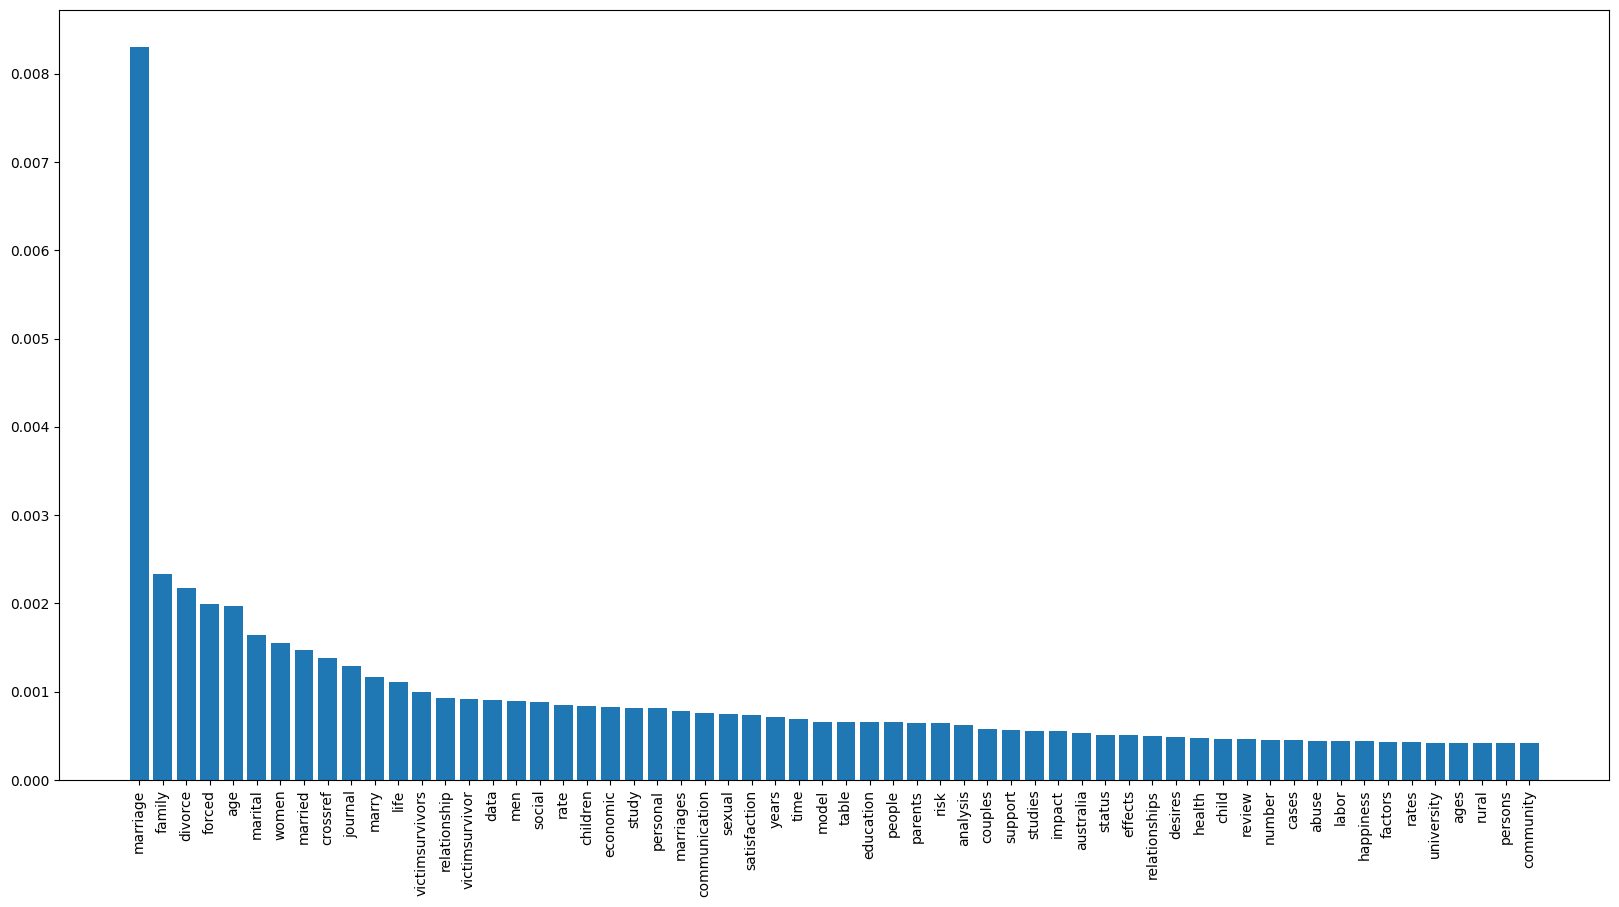

In [31]:
filtered_scholar = 0
if not filtered_scholar:
    word_count = filter_common_words(master_counter)
    word_count = sort_words(word_count)
    filtered_scholar = 1
most_common_words = (Counter(word_count).most_common(60))
#Convert word count to frequency
most_common_words = {k: v / total_words for k, v in most_common_words}
#Plot
plt.figure(figsize=(20,10))
plt.bar(range(len(most_common_words)), list(most_common_words.values()), align='center')
plt.xticks(range(len(most_common_words)), list(most_common_words.keys()), rotation='vertical')
plt.show()

In [18]:
import wordcloud
wordcloud = wordcloud.WordCloud(stopwords=stopwords, background_color="white").generate(text_total)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



NameError: name 'text_total' is not defined